# Trial

Essential libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Making arrays of N, Z, A and y the binding Energies

In [3]:
N = np.genfromtxt('expthediff.dat',usecols=0) #Number of neutrons
Z = np.genfromtxt('expthediff.dat',usecols=1) #Number of protons
A = N+Z # Total number of Nucleons
# Difference between the experimental binding energy and the Liquid drop model
y = np.genfromtxt('expthediff.dat',usecols=2)



# Initial Plots of N, Z, A to Binding Energies

Binding Energies against Number of Protons

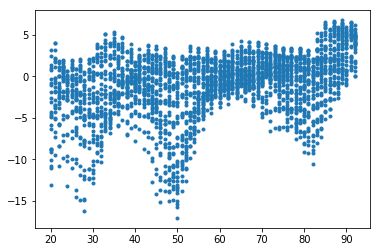

In [4]:
plt.plot(Z,y,'o',markersize=3)
plt.show()

Binding Energies against Number of Neutrons

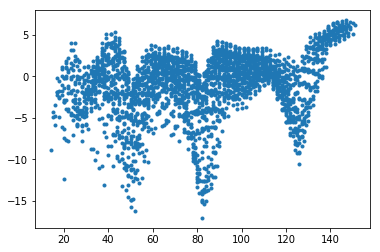

In [5]:
plt.plot(N,y,'o',markersize=3)
plt.show()

Binding Energies against Number of Atomic Number

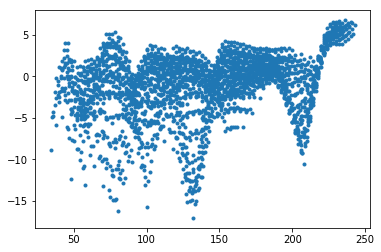

In [6]:
plt.plot(A,y,'o',markersize=3)
plt.show()

N vs Z with Binding Energies indicated in color

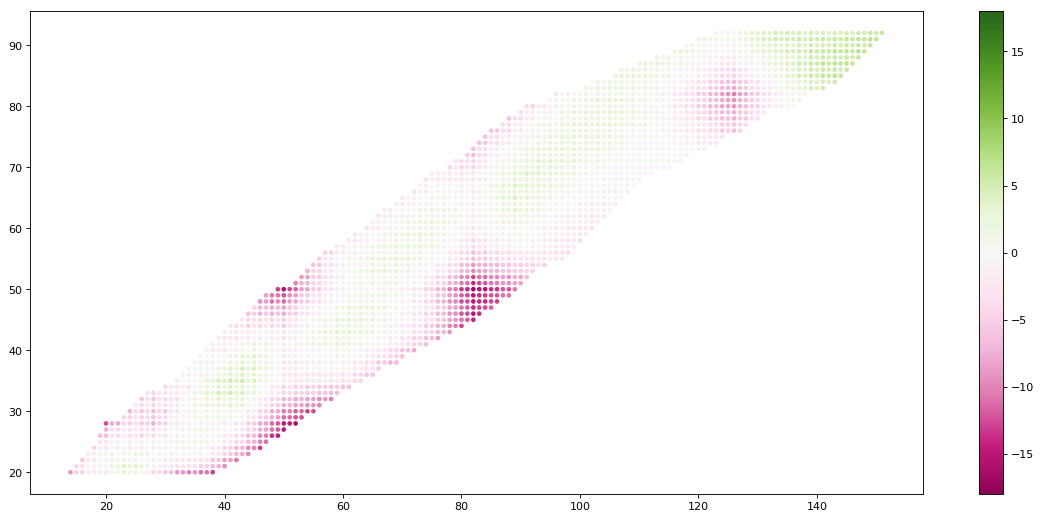

In [8]:
ext = np.int(np.ceil(max(-np.min(y),np.max(y))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N,Z,c=y,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()

Splitting test data set into train and test est

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = np.transpose(np.stack((N,Z)))
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler().fit(X_train) # This sets the shifting and scaling so the training features have mean zero and variance 1

Xs_train = scaler.transform(X_train) # Scaling the training features

Xs_test = scaler.transform(X_test) #Using the SAME scaling on the test features in order to get the correct score


# Making rf the Random Forest object

Using Scaling innitially

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf.fit(Xs_train, y_train);


In [47]:
predictions=rf.predict(Xs_train)
errors = predictions-y_train
print('Without Magic Numbers as Features')
print('Mean Absolute Error for train data:', round(np.mean(errors), 5), )
print('Median Absolute Error for train data:', round(np.median(errors), 5), '\n')
Etrain1=np.mean(errors)
Emedtrain1=np.median(errors)

predictions=rf.predict(Xs_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for test data:', round(np.mean(errors), 5) )
print('Median Absolute Error for test data:', round(np.median(errors), 5), '\n\n')
Etest1=np.mean(errors)
Emedtest1=np.median(errors)



#the coefficient of determination R^2 of the prediction
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().     
trainscore1=rf.score(Xs_train, y_train)
testscore1=rf.score(Xs_test, y_test)

print('The coefficient of determination for training: ', round(trainscore1,5))
print('The coefficient of determination for testing: ', round(testscore1,5))



Without Magic Numbers as Features
Mean Absolute Error for train data: 0.00233
Median Absolute Error for train data: -0.03566 

Mean Absolute Error for test data: 0.63201
Median Absolute Error for test data: 0.57293 


The coefficient of determination for training:  0.99458
The coefficient of determination for testing:  0.95372
0.49816124237028486


In [15]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

ModuleNotFoundError: No module named 'pydot'

# Feature Importance for N and Z

In [16]:
#Paramater Weight 
print('N:', rf.feature_importances_[0])
print('Z:', rf.feature_importances_[1],     '\n')


N: 0.5226899411160186
Z: 0.4773100588839815 



# Graphing

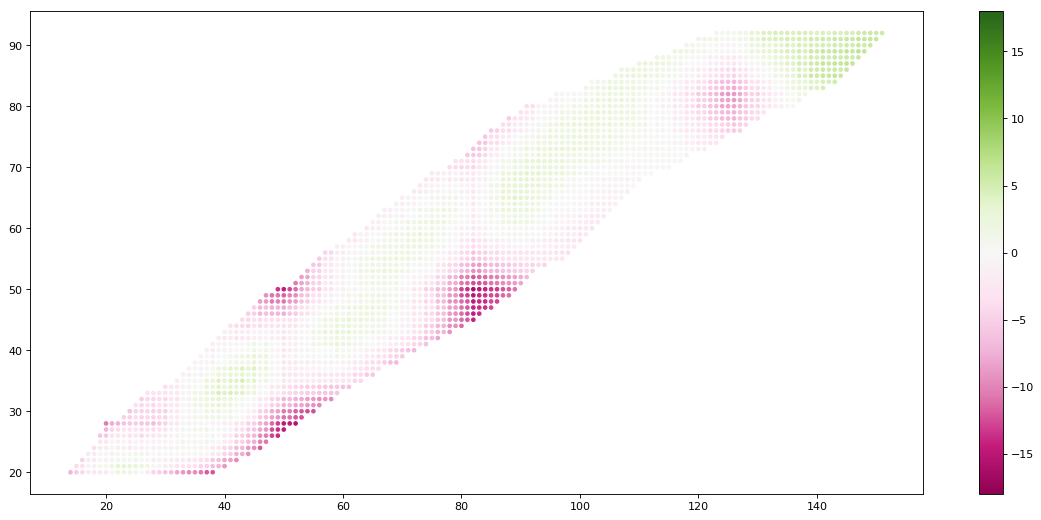

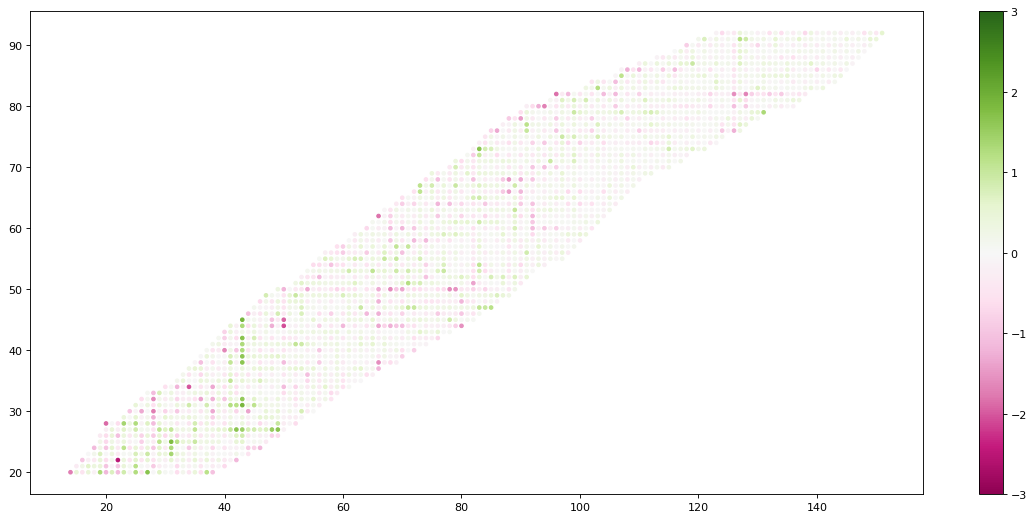

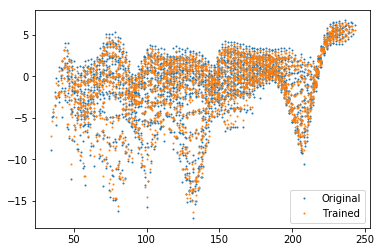

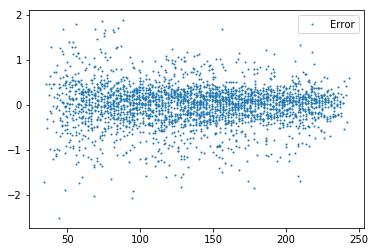

In [19]:
Xs = scaler.transform(X)
pred_all = rf.predict(Xs) 


fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()

err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()


plt.plot(N+Z,y,'o',markersize=1,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=1,label='Trained')
plt.legend()
plt.show()

plt.plot(np.transpose(X)[0]+np.transpose(X)[1],err_all,'o',markersize=1,label='Error')
plt.legend()
plt.show()


# adding magic numbers as a feature




In [20]:
X=np.transpose(np.stack((N,Z,N+Z,N-Z,np.exp(-(20-N)**2/20.),np.exp(-(20-Z)**2/20.),np.exp(-(28-N)**2/20.),np.exp(-(28-Z)**2/20.),np.exp(-(50-N)**2/20.),np.exp(-(50-Z)**2/20.),np.exp(-(80-N)**2/20.),np.exp(-(80-Z)**2/20.),np.exp(-(126-N)**2/20.),np.exp(-(126-Z)**2/20.))))

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)

scaler = StandardScaler().fit(X_train) # This sets the shifting and scaling so the training features have mean zero and variance 1

Xs_train = scaler.transform(X_train) # Scaling the training features

Xs_test = scaler.transform(X_test) #Using the SAME scaling on the test features in order to get the correct score


In [21]:
# Instantiate model 
rf.fit(Xs_train, y_train);

In [22]:

print('Without magic numbers as a feature:')
print('Mean Absolute Error for Xs_train data:', Etrain1)
print('Median Absolute Error for Xs_train data:', Emedtrain1, '\n')

print('Mean Absolute Error for Xs_test data:', Etest1)
print('Median Absolute Error for Xs_test data:', Emedtest1, '\n')

print('Mean Error difference between test and train data: ', round(Etest1-Etrain1, 5) )
print('Median Error difference  between test and train data: ', round(Emedtest1-Emedtrain1, 5), "\n\n\n")


predictions=rf.predict(Xs_train)
errors = abs(predictions- y_train)
Etrain2=np.mean(errors)
Emedtrain2=np.median(errors)

predictions=rf.predict(Xs_test)
errors = abs(predictions - y_test)
Etest2=np.mean(errors)
Emedtest2=np.median(errors)


print('With magic numbers as a feature:')

print('Mean Absolute Error for Xs_train data', Etrain2 )
print('Median Absolute Error for Xs_train data', Emedtrain2, '\n')

print('Mean Absolute Error for Xs_test data:', Etest2)
print('Median Absolute Error for Xs_test data:', Emedtest2, '\n')

print('Mean Error difference between test and train data: ', Etest2-Etrain2)
print('Median Error difference between test and train data: ', Emedtest2-Emedtrain2, '\n\n\n')


imprtest=Etest2-Etest1
imprtrain=Etrain2-Etrain1

imprmedtest=Emedtest2-Emedtest1
imprmedtrain=Emedtrain2-Emedtrain1


print('===================================================')
print('difference between the mean train error of with and without added features:', imprtrain)
print('difference between the mean test error of with and without added features', imprtest, '\n')

print('difference between the median train error of with and without added features', imprmedtrain)
print('difference between the median test error of with and without added features', imprmedtest)
print('===================================================', '\n\n\n')

trainscore2=rf.score(Xs_train, y_train)
testscore2=rf.score(Xs_test, y_test)



print('Without magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1, '\n')


print('With magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore2)
print('The coefficient of determination for testing: ', testscore2)
print('score difference: ', trainscore2-testscore2, '\n\n\n')

imprtestscore=testscore2-testscore1
imprtrainscore=trainscore2-trainscore1


print('===================================================')
print('difference between the train score of with and without added features:', imprtrainscore)
print('difference between the test score of with and without added features', imprtestscore)
print('===================================================', '\n\n\n')



Without magic numbers as a feature:
Mean Absolute Error for Xs_train data: 0.2254688393694846
Median Absolute Error for Xs_train data: 0.199494874029984 

Mean Absolute Error for Xs_test data: 0.6510083457779388
Median Absolute Error for Xs_test data: 0.6092178735245561 

Mean Error difference between test and train data:  0.42554
Median Error difference  between test and train data:  0.40972 



With magic numbers as a feature:
Mean Absolute Error for Xs_train data 0.2780533198937998
Median Absolute Error for Xs_train data 0.24987518322959978 

Mean Absolute Error for Xs_test data: 0.739879356825602
Median Absolute Error for Xs_test data: 0.6574087498499943 

Mean Error difference between test and train data:  0.46182603693180224
Median Error difference between test and train data:  0.4075335666203945 



difference between the mean train error of with and without added features: 0.052584480524315164
difference between the mean test error of with and without added features 0.088871011

# Feature Importance

In [23]:

print('N:', rf.feature_importances_[0])
print('Z:', rf.feature_importances_[1],     '\n')

print('N+Z:', rf.feature_importances_[2])
print('N-Z:', rf.feature_importances_[3],   '\n')

print('20-N:', rf.feature_importances_[4])
print('20-Z:', rf.feature_importances_[5],  '\n')

print('28-N:', rf.feature_importances_[6])
print('28-Z:', rf.feature_importances_[7],  '\n')

print('50-N:', rf.feature_importances_[8])
print('50-Z:', rf.feature_importances_[9],  '\n')

print('80-N:', rf.feature_importances_[10])
print('80-Z:', rf.feature_importances_[11], '\n')

print('126-N:', rf.feature_importances_[12])
print('126-Z:', rf.feature_importances_[13],'\n')

rf.feature_importances_


N: 0.08027236767560354
Z: 0.16596201351021916 

N+Z: 0.15205418630802964
N-Z: 0.2933214991693055 

20-N: 0.0035144707277425763
20-Z: 0.028940493130281172 

28-N: 0.006688751042038019
28-Z: 0.02770646865932646 

50-N: 0.06077778087235604
50-Z: 0.07302809950679397 

80-N: 0.027165479797011054
80-Z: 0.029767721819489324 

126-N: 0.04950343924183593
126-Z: 0.0012972285399675827 



array([0.08027237, 0.16596201, 0.15205419, 0.2933215 , 0.00351447,
       0.02894049, 0.00668875, 0.02770647, 0.06077778, 0.0730281 ,
       0.02716548, 0.02976772, 0.04950344, 0.00129723])

# Graphing

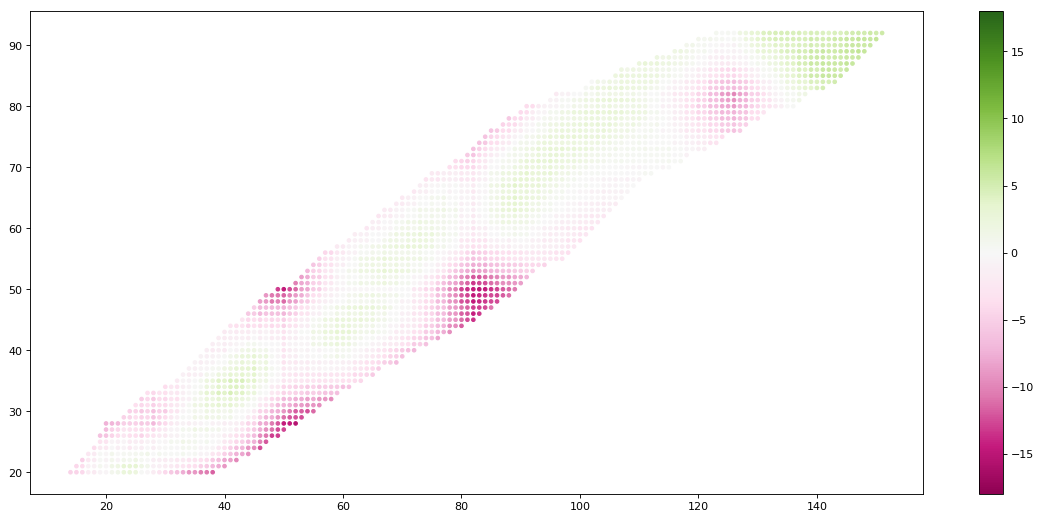

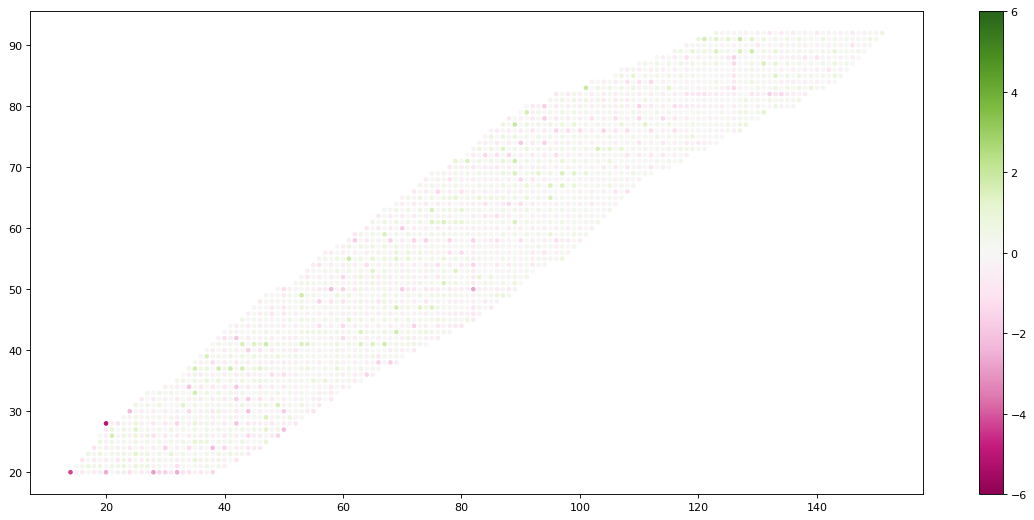

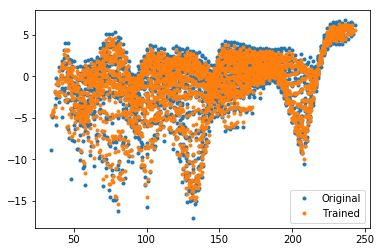

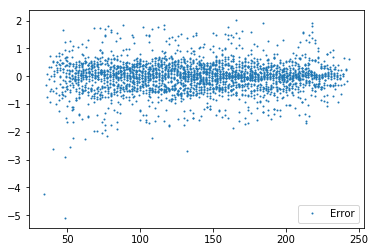

In [30]:
#Have to refit rf with all of X and y 
#Unlike with scaling

Xs = scaler.transform(X)
pred_all = rf.predict(Xs) 

fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()

#plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],err_all,'o',markersize=1,label='Error')
plt.legend()
plt.show()




# Random Forest without Scaling 

Innitially without magic Numbers as Features.

In [31]:
X = np.transpose(np.stack((N,Z)))
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [32]:
# Instantiate model 
rf.fit(X_train, y_train);


In [33]:
predictions=rf.predict(X_train)
errors = abs(predictions-y_train)

print('Mean Absolute Error for train data:', round(np.mean(errors), 5), )
print('Median Absolute Error for train data:', round(np.median(errors), 5), '\n')
Etrain1=np.mean(errors)
Emedtrain1=np.median(errors)

predictions=rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error for test data:', round(np.mean(errors), 5) )
print('Median Absolute Error for test data:', round(np.median(errors), 5),  '\n\n\n')
Etest1=np.mean(errors)
Emedtest1=np.median(errors)


#the coefficient of determination R^2 of the prediction
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().     
trainscore1=rf.score(X_train, y_train)
testscore1=rf.score(X_test, y_test)

print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1)


Mean Absolute Error for train data: 0.22212
Median Absolute Error for train data: 0.19966 

Mean Absolute Error for test data: 0.64115
Median Absolute Error for test data: 0.56321 



The coefficient of determination for training:  0.9949873211332458
The coefficient of determination for testing:  0.9461358934973093
score difference:  0.04885142763593653


In [34]:
#Feature Importance

print('N:', rf.feature_importances_[0])
print('Z:', rf.feature_importances_[1],     '\n')



N: 0.5292006804889472
Z: 0.47079931951105236 



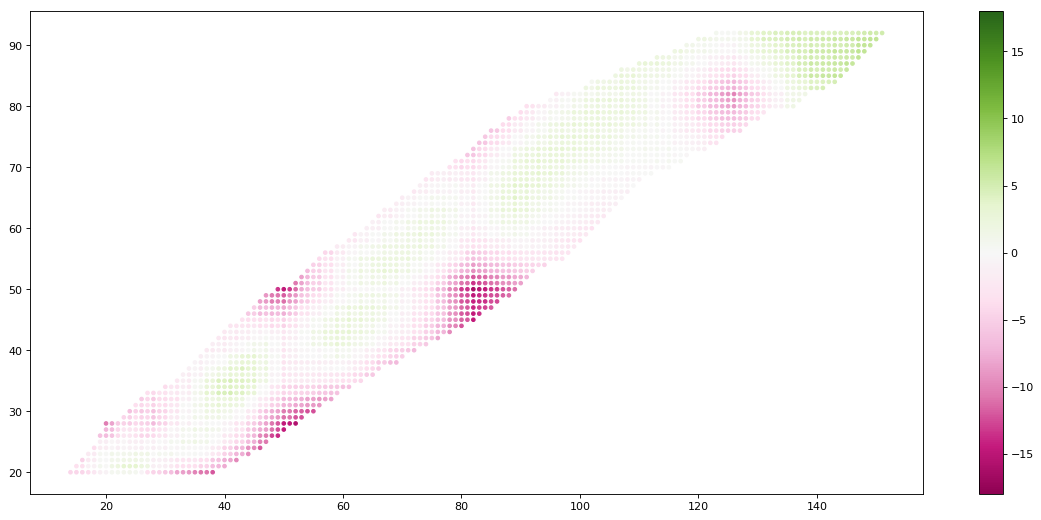

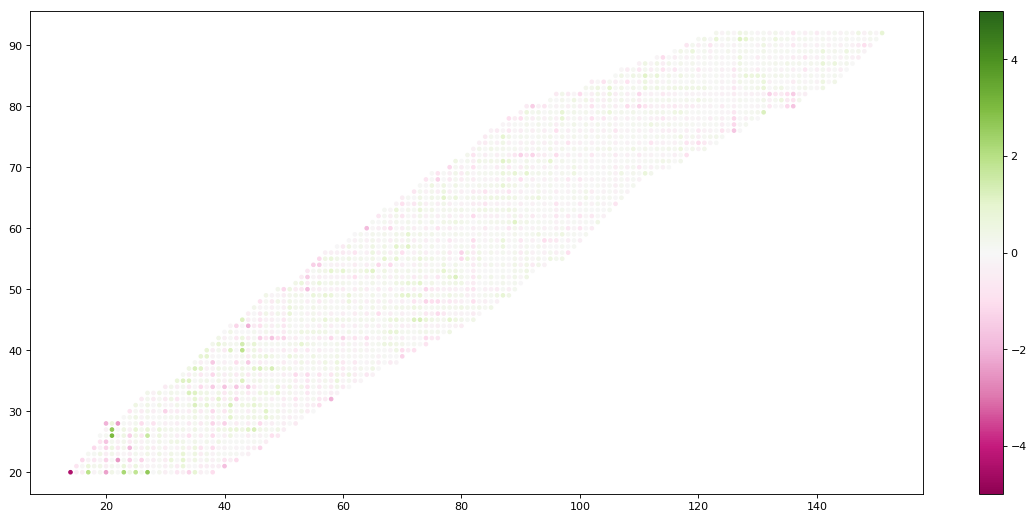

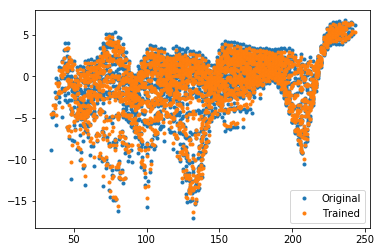

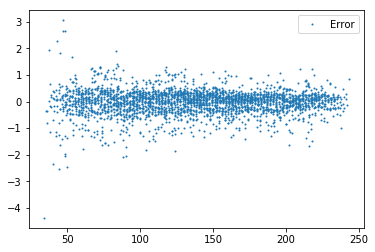

In [36]:

pred_all = rf.predict(X) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()

plt.plot(np.transpose(X)[0]+np.transpose(X)[1],err_all,'o',markersize=1,label='Error')
plt.legend()
plt.show()



# adding magic numbers as a feature

still without scaling


In [37]:
X=np.transpose(np.stack((N,Z,N+Z,N-Z,np.exp(-(20-N)**2/20.),np.exp(-(20-Z)**2/20.),np.exp(-(28-N)**2/20.),np.exp(-(28-Z)**2/20.),np.exp(-(50-N)**2/20.),np.exp(-(50-Z)**2/20.),np.exp(-(80-N)**2/20.),np.exp(-(80-Z)**2/20.),np.exp(-(126-N)**2/20.),np.exp(-(126-Z)**2/20.))))

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [38]:
# Instantiate model 
rf.fit(X_train, y_train);

In [39]:

print('Without magic numbers as a feature:')
print('Mean Absolute Error for Xs_train data:', round(Etrain1,5))
print('Median Absolute Error for Xs_train data:', round(Emedtrain1, 5), "\n")

print('Mean Absolute Error for Xs_test data:', round(Etest1,5))
print('Median Absolute Error for Xs_test data:', round(Emedtest1, 5), "\n")

print('Mean Error difference between test and train: ', round((Etest1-Etrain1),5) )
print('Median Error difference between test and train: ', round( (Emedtest1-Emedtrain1) ,5), "\n\n\n")


predictions=rf.predict(X_train)
errors = abs(predictions- y_train)
Etrain2=np.mean(errors)
Emedtrain2=np.median(errors)


predictions=rf.predict(X_test)
errors = abs(predictions - y_test)
Etest2=np.mean(errors)
Emedtest2=np.median(errors)


print('With magic numbers as a feature:')
print('Mean Absolute Error for Xs_train data', round(Etrain2, 5) )
print('Median Absolute Error for Xs_train data', round(Emedtrain2, 5), '\n' )


print('Mean Absolute Error for Xs_test data:', round(Etest2, 5))
print('Median Absolute Error for Xs_test data:', round(Emedtest2, 5), '\n')

print('Mean Error difference between test and train: : ', round((Etest2-Etrain2),5))
print('Median Error difference between test and train: : ', round((Emedtest2-Emedtrain2),5),  '\n\n\n')


imprtest=Etest2-Etest1
imprtrain=Etrain2-Etrain1

imprmedtest=Emedtest2-Emedtest1
imprmedtrain=Emedtrain2-Emedtrain1

print('===================================================')
print('Difference between mean train error of with and and without MN features:', round(imprtrain,5))
print('Difference between mean test error of with and and without MN features:',  round(imprtest,5 ), '\n')

print('Difference between median train error of with and and without MN features:', round(imprmedtrain,5))
print('Difference between median test error of with and and without MN features:',  round(imprmedtest,5 ))
print('===================================================', '\n\n\n')

trainscore2=rf.score(X_train, y_train)
testscore2=rf.score(X_test, y_test)



print('Without magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1, '\n')


print('With magic numbers as a feature:')
print('The coefficient of determination for training: ', trainscore2)
print('The coefficient of determination for testing: ', testscore2)
print('score difference: ', trainscore2-testscore2, '\n\n\n')

imprtestscore=testscore2-testscore1
imprtrainscore=trainscore2-trainscore1


print('===================================================')
print('Difference between training score with and and without MN features:', imprtrainscore)
print('Difference between testing score with and and without MN features:', imprtestscore)
print('===================================================', '\n\n\n')



Without magic numbers as a feature:
Mean Absolute Error for Xs_train data: 0.22212
Median Absolute Error for Xs_train data: 0.19966 

Mean Absolute Error for Xs_test data: 0.64115
Median Absolute Error for Xs_test data: 0.56321 

Mean Error difference between test and train:  0.41903
Median Error difference between test and train:  0.36355 



With magic numbers as a feature:
Mean Absolute Error for Xs_train data 0.27108
Median Absolute Error for Xs_train data 0.245 

Mean Absolute Error for Xs_test data: 0.74519
Median Absolute Error for Xs_test data: 0.66409 

Mean Error difference between test and train: :  0.47411
Median Error difference between test and train: :  0.41909 



Difference between mean train error of with and and without MN features: 0.04895
Difference between mean test error of with and and without MN features: 0.10404 

Difference between median train error of with and and without MN features: 0.04534
Difference between median test error of with and and without MN f

In [40]:
print('N:', rf.feature_importances_[0])
print('Z:', rf.feature_importances_[1],     '\n')

print('N+Z:', rf.feature_importances_[2])
print('N-Z:', rf.feature_importances_[3],   '\n')

print('20-N:', rf.feature_importances_[4])
print('20-Z:', rf.feature_importances_[5],  '\n')

print('28-N:', rf.feature_importances_[6])
print('28-Z:', rf.feature_importances_[7],  '\n')

print('50-N:', rf.feature_importances_[8])
print('50-Z:', rf.feature_importances_[9],  '\n')

print('80-N:', rf.feature_importances_[10])
print('80-Z:', rf.feature_importances_[11], '\n')

print('126-N:', rf.feature_importances_[12])
print('126-Z:', rf.feature_importances_[13],'\n')

rf.feature_importances_


N: 0.0875152065813832
Z: 0.16405054623163118 

N+Z: 0.15644289622961383
N-Z: 0.3163740590256497 

20-N: 0.003764956304580851
20-Z: 0.028813820634712654 

28-N: 0.006462947259365448
28-Z: 0.027243008089900555 

50-N: 0.04996555209449726
50-Z: 0.07180477283253223 

80-N: 0.0270705712528439
80-Z: 0.028170535960318103 

126-N: 0.032321127502971524
126-Z: 0.0 



array([0.08751521, 0.16405055, 0.1564429 , 0.31637406, 0.00376496,
       0.02881382, 0.00646295, 0.02724301, 0.04996555, 0.07180477,
       0.02707057, 0.02817054, 0.03232113, 0.        ])

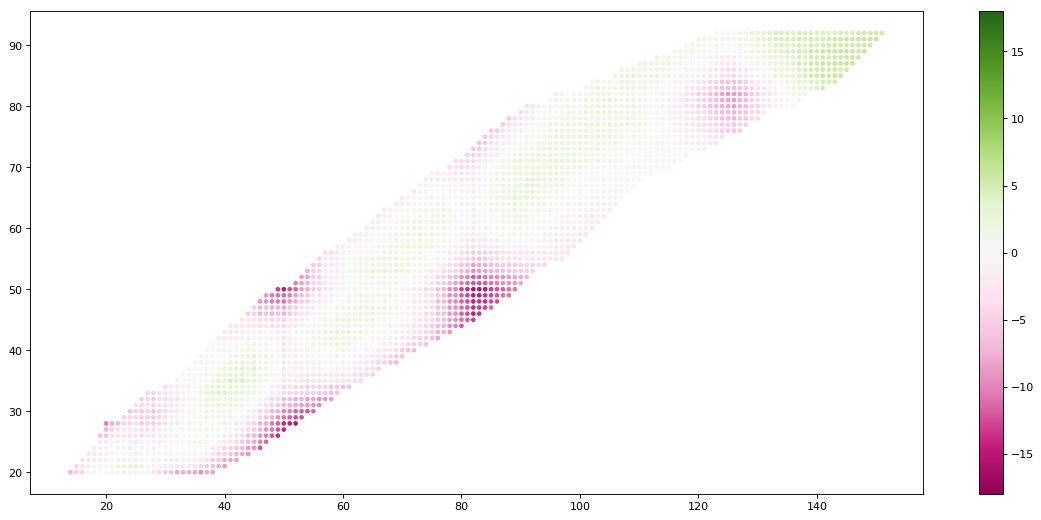

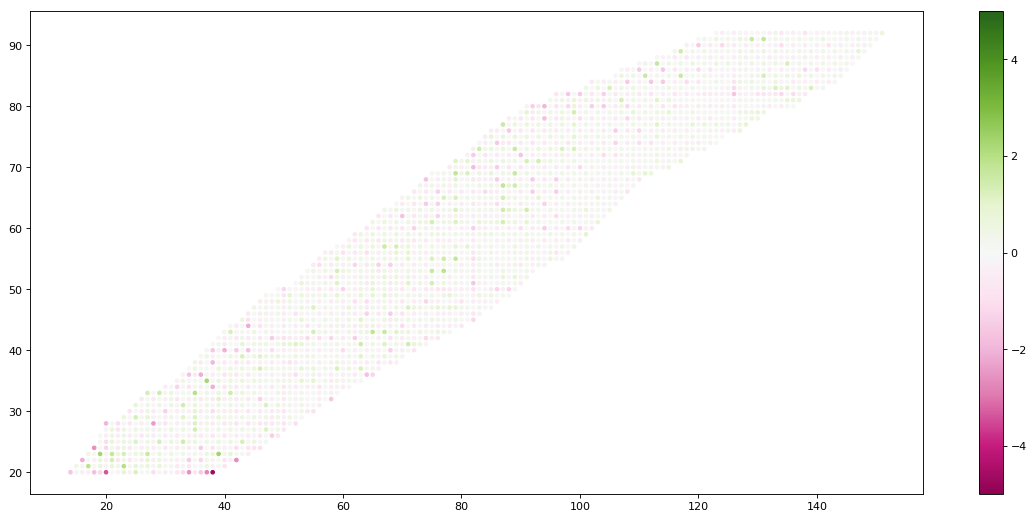

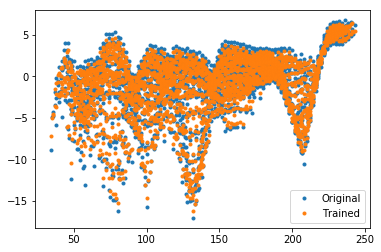

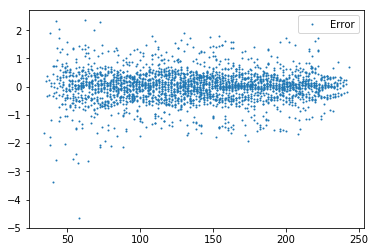

In [41]:
#Have to refit rf with all of X and y 
#Unlike with scaling

pred_all = rf.predict(X) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()

plt.plot(np.transpose(X)[0]+np.transpose(X)[1],err_all,'o',markersize=1,label='Error')
plt.legend()
plt.show()



# Evaluating RF parameters

In [32]:
X = np.transpose(np.stack((N,Z)))
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [33]:
scaler = StandardScaler().fit(X_train) # This sets the shifting and scaling so the training features have mean zero and variance 1

Xs_train = scaler.transform(X_train) # Scaling the training features

Xs_test = scaler.transform(X_test) #Using the SAME scaling on the test features in order to get the correct score


In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [35]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(Xs_train, y_train)
print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.4min finished


{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}


-0.24035023817590845


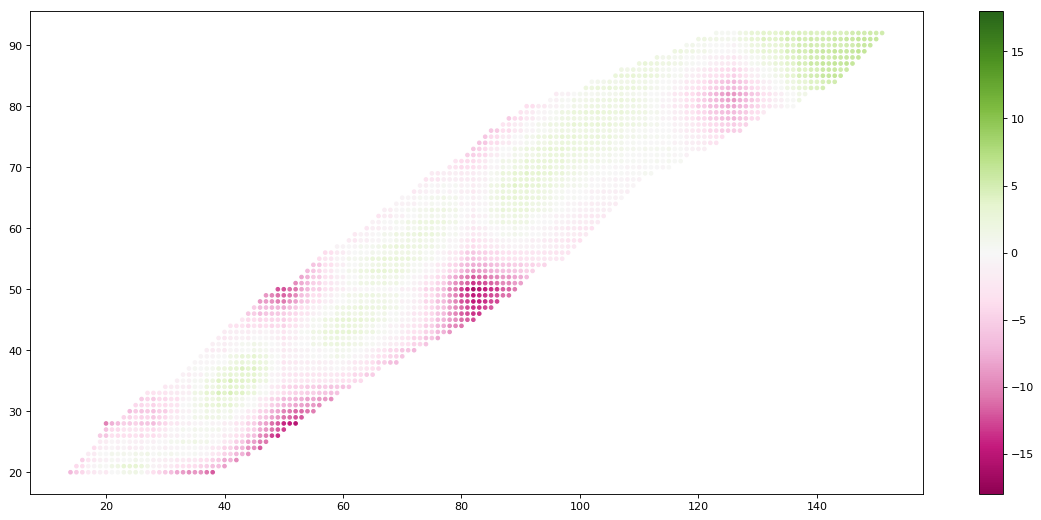

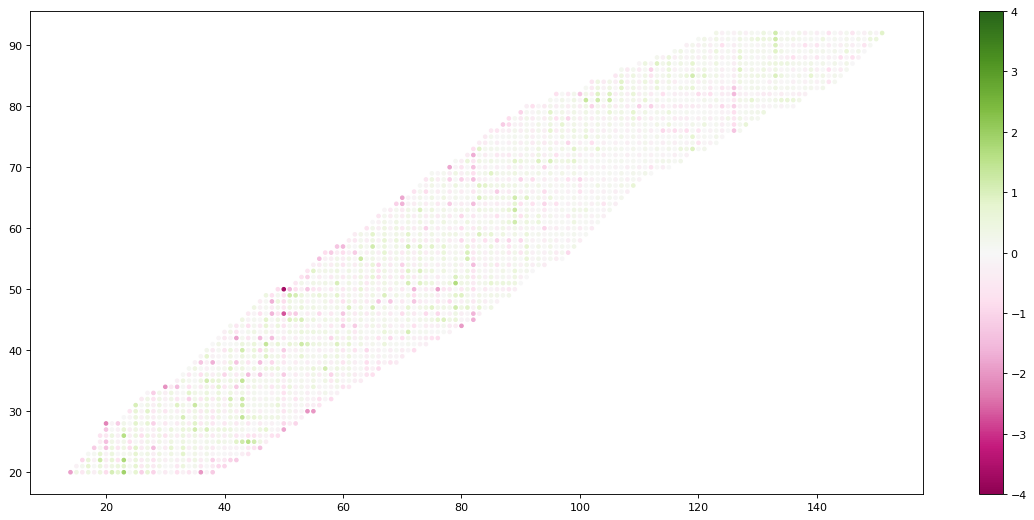

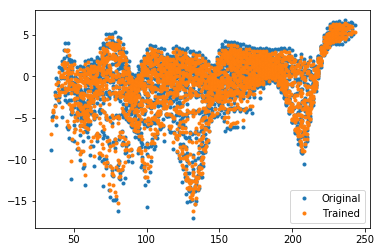

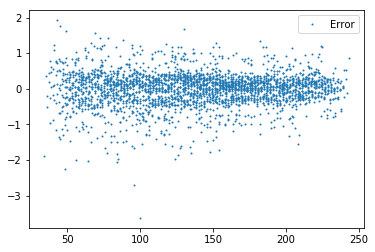

In [39]:
#Have to refit rf with all of X and y 
#Unlike with scaling
print(rf_random.score(Xs_train, y_train))
Xs = scaler.transform(X)
pred_all = rf_random.predict(Xs) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()

plt.plot(np.transpose(X)[0]+np.transpose(X)[1],err_all,'o',markersize=1,label='Error')
plt.legend()
plt.show()

In [40]:
predictions=rf_random.predict(Xs_train)
errors = predictions-y_train
print('Without Magic Numbers as Features')
print('Mean Error for train data:', round(np.mean(errors), 5), )
print('Median Error for train data:', round(np.median(errors), 5),'\n' )
Etrain1=np.mean(errors)
Emedtrain1=np.median(errors)

predictions=rf_random.predict(Xs_test)
# Calculate the absolute errors
errors = predictions-y_test
# Print out the mean absolute error (mae)
print('Mean Error for test data:', round(np.mean(errors), 5), )
print('Median Error for test data:', round(np.median(errors), 5), '\n\n' )

Etest1=np.mean(errors)
Emedtest1=np.median(errors)


#the coefficient of determination R^2 of the prediction
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().     
trainscore1=rf_random.score(Xs_train, y_train)
testscore1=rf_random.score(Xs_test, y_test)

print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1)


Without Magic Numbers as Features
Mean Error for train data: 0.00834
Median Error for train data: -0.0325 

Mean Error for test data: 0.02407
Median Error for test data: -0.08457 


The coefficient of determination for training:  -0.24035023817590845
The coefficient of determination for testing:  -0.6450012064850665
score difference:  0.4046509683091581


In [41]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 6, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(Xs_train, y_train)
print(rf_random.best_params_)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  8.8min finished


{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}


-0.24035023817590845


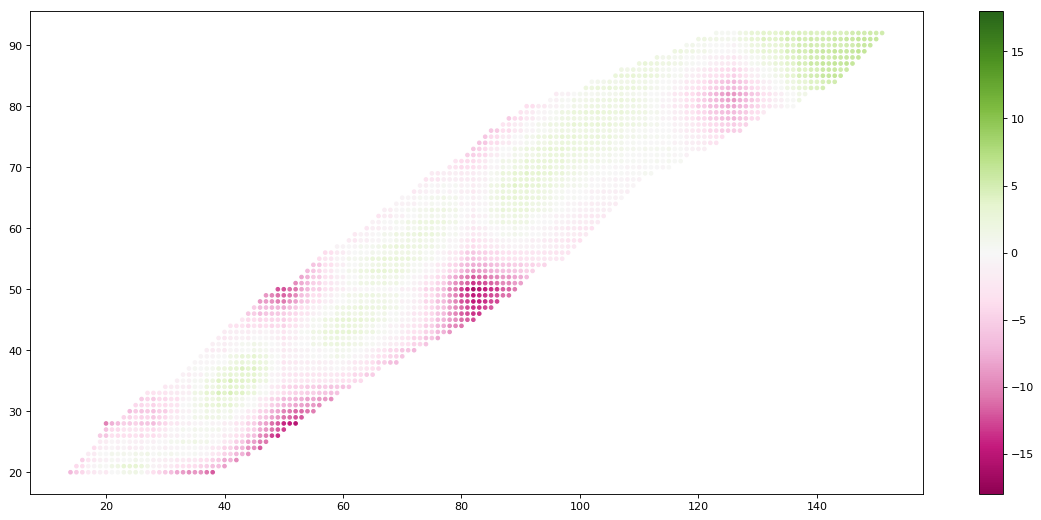

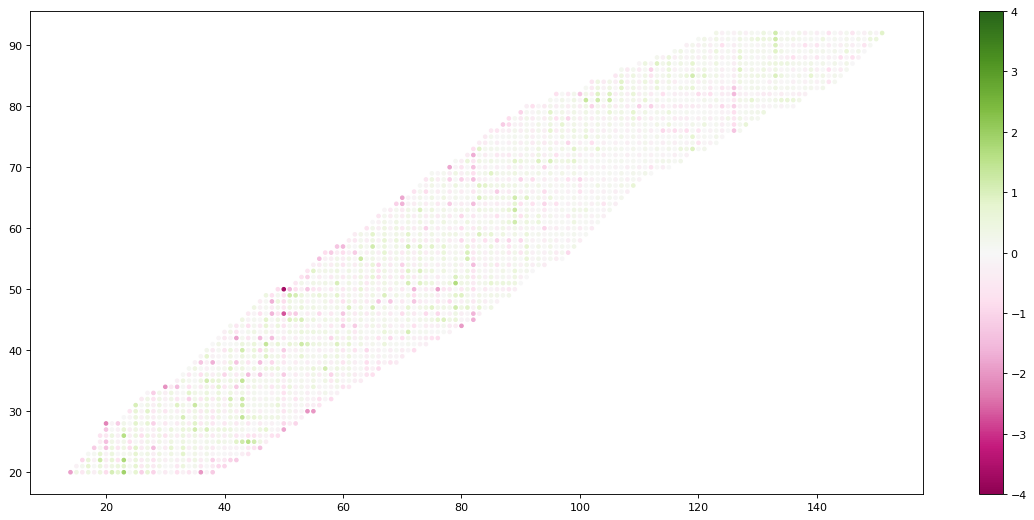

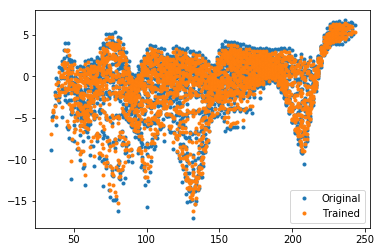

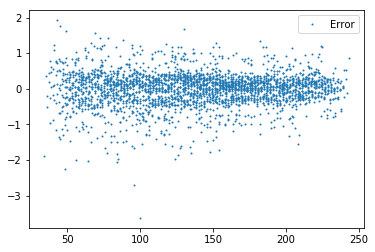

In [42]:
#Have to refit rf with all of X and y 
#Unlike with scaling
print(rf_random.score(Xs_train, y_train))
Xs = scaler.transform(X)
pred_all = rf_random.predict(Xs) 
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=pred_all,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.show()


err_all=y-pred_all
ext1 = np.int(np.ceil(max(-np.min(err_all),np.max(err_all))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(X)[0],np.transpose(X)[1],c=err_all,cmap='PiYG',vmin=-ext1,vmax=ext1,s=10)
plt.colorbar(sc)
plt.show()

plt.plot(N+Z,y,'o',markersize=3,label='Original')
plt.plot(np.transpose(X)[0]+np.transpose(X)[1],pred_all,'o',markersize=3,label='Trained')
plt.legend()
plt.show()

plt.plot(np.transpose(X)[0]+np.transpose(X)[1],err_all,'o',markersize=1,label='Error')
plt.legend()
plt.show()


In [43]:
predictions=rf_random.predict(Xs_train)
errors = predictions-y_train
print('Without Magic Numbers as Features')
print('Mean Error for train data:', round(np.mean(errors), 5), )
print('Median Error for train data:', round(np.median(errors), 5),'\n' )
Etrain1=np.mean(errors)
Emedtrain1=np.median(errors)

predictions=rf_random.predict(Xs_test)
# Calculate the absolute errors
errors = predictions-y_test
# Print out the mean absolute error (mae)
print('Mean Error for test data:', round(np.mean(errors), 5), )
print('Median Error for test data:', round(np.median(errors), 5), '\n\n' )

Etest1=np.mean(errors)
Emedtest1=np.median(errors)


#the coefficient of determination R^2 of the prediction
# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().     
trainscore1=rf_random.score(Xs_train, y_train)
testscore1=rf_random.score(Xs_test, y_test)

print('The coefficient of determination for training: ', trainscore1)
print('The coefficient of determination for testing: ', testscore1)
print('score difference: ', trainscore1-testscore1)


Without Magic Numbers as Features
Mean Error for train data: 0.00834
Median Error for train data: -0.0325 

Mean Error for test data: 0.02407
Median Error for test data: -0.08457 


The coefficient of determination for training:  -0.24035023817590845
The coefficient of determination for testing:  -0.6450012064850665
score difference:  0.4046509683091581
